In [ ]:
#!pip install librosa

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
filename = 'DeepAudioClassification-main\data\Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-23.wav'

In [6]:
import IPython.display as ipd
import librosa
import librosa.display

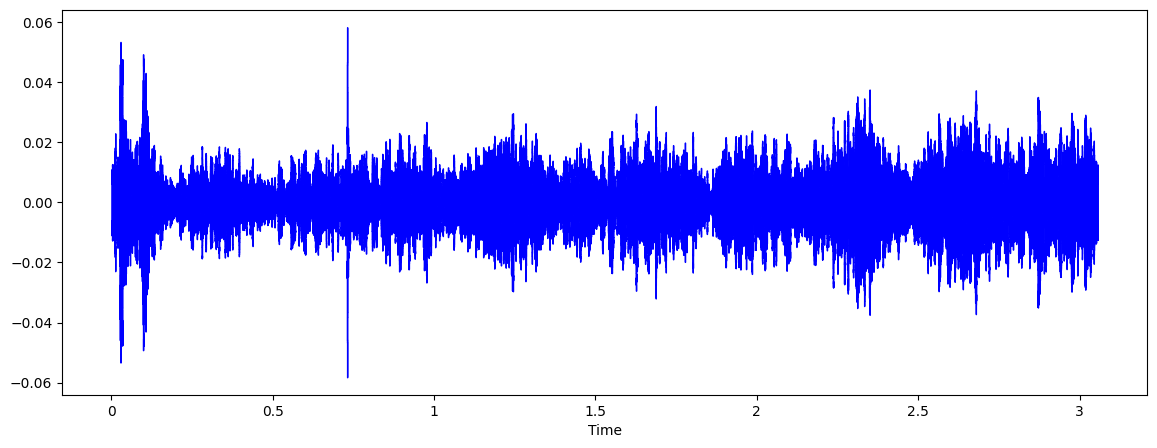

In [30]:
##capuchin bird sound
plt.figure(figsize=(14,5))
data, sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate,color="blue")
ipd.Audio(filename)

In [10]:
sample_rate

22050

In [31]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [32]:
wave_sample_rate

44100

In [33]:
wave_audio

array([[-125, -727],
       [-246, -487],
       [-302,  -94],
       ...,
       [ 206,  775],
       [ 272,  703],
       [ 352,  397]], dtype=int16)

In [14]:
data

array([-0.00989698, -0.01539352, -0.02271187, ...,  0.05113414,
        0.04447142,  0.00015946], dtype=float32)

In [19]:
#!pip install pandas

In [20]:
import pandas as pd



In [21]:
results=pd.read_csv('DeepAudioClassification-main/results.csv')
results.head(10)

,recording,capuchin_calls
0,recording_00.mp3,5
1,recording_01.mp3,0
2,recording_02.mp3,0
3,recording_03.mp3,0
4,recording_04.mp3,4
5,recording_05.mp3,0
6,recording_06.mp3,5
7,recording_07.mp3,2
8,recording_08.mp3,23
9,recording_09.mp3,0


# AudioclassificationPreprocessing

In [34]:
librosa_audio_data, librosa_sample_rate = librosa.load(filename)

In [35]:
print(librosa_audio_data)

[-0.00965457 -0.0071637   0.00606872 ...  0.00032476  0.01156571
  0.01498501]


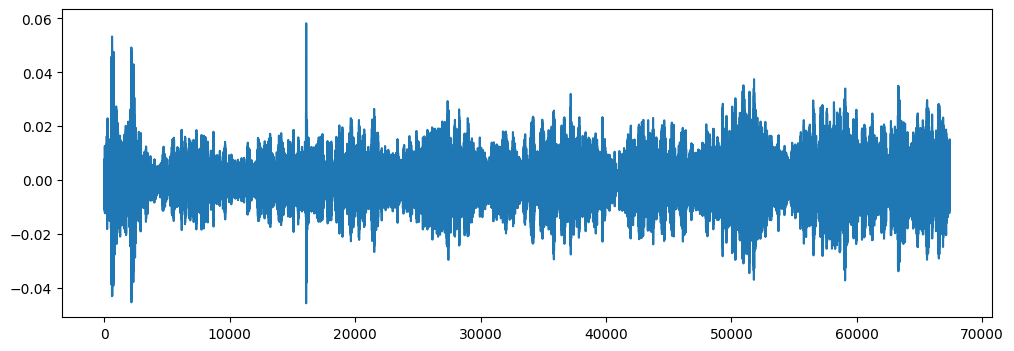

In [36]:
##plot librosa audio data
plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)
#librosa converts it into a monochannel

In [37]:
wave_sample_rate, wave_audio = wav.read(filename)

In [38]:
wave_audio

array([[-125, -727],
       [-246, -487],
       [-302,  -94],
       ...,
       [ 206,  775],
       [ 272,  703],
       [ 352,  397]], dtype=int16)

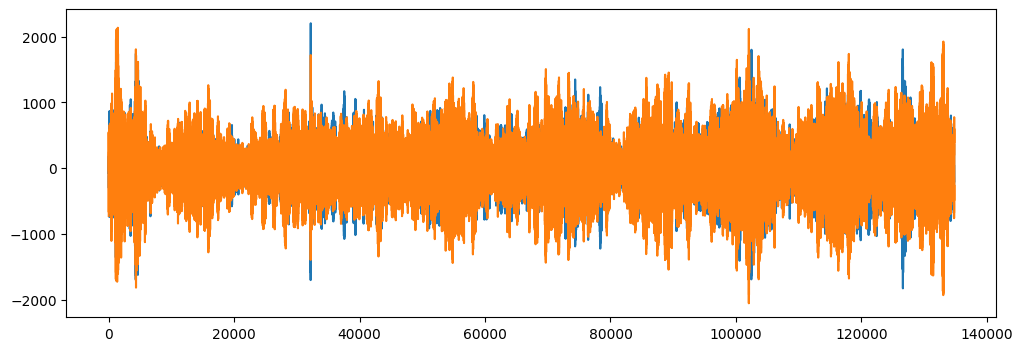

In [39]:
plt.figure(figsize=(12,4))
plt.plot(wave_audio)
#two channels overlap(stereo)

In [45]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 132)


In [46]:
mfccs

array([[-442.1136   , -433.0945   , -525.061    , ..., -573.0255   ,
        -538.3141   , -452.6964   ],
       [  21.120346 ,   35.555443 ,   80.17029  , ...,   87.78902  ,
          74.97589  ,   40.689484 ],
       [ -94.738235 , -148.0798   , -236.19817  , ..., -198.9397   ,
        -166.06783  ,  -88.54833  ],
       ...,
       [   4.432215 ,    5.5383344,    8.705734 , ...,   -4.5219936,
          -2.8392665,   -2.3716555],
       [  -3.0700822,    1.2077123,    1.7794454, ...,   -3.8022685,
          -4.6275706,   -0.6556566],
       [  -5.0016503,   -1.787447 ,    4.68563  , ...,    9.76959  ,
           8.805687 ,    6.183541 ]], dtype=float32)

In [47]:
import os

In [48]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs.T, axis=0)

    return mfccs_scaled_features